In [1]:
from __future__ import print_function
import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy import stats
from scipy.optimize import curve_fit, minimize
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
distributions = ['chisq', 'normal', 'pois', 'binomial', 'exponential']
mymean = 100
df = mymean 

In [3]:
mysize = np.array(list(range(10,2001,20)))
print (mysize, mysize.shape)

[  10   30   50   70   90  110  130  150  170  190  210  230  250  270  290
  310  330  350  370  390  410  430  450  470  490  510  530  550  570  590
  610  630  650  670  690  710  730  750  770  790  810  830  850  870  890
  910  930  950  970  990 1010 1030 1050 1070 1090 1110 1130 1150 1170 1190
 1210 1230 1250 1270 1290 1310 1330 1350 1370 1390 1410 1430 1450 1470 1490
 1510 1530 1550 1570 1590 1610 1630 1650 1670 1690 1710 1730 1750 1770 1790
 1810 1830 1850 1870 1890 1910 1930 1950 1970 1990] (100,)


# 1. Chi-square Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


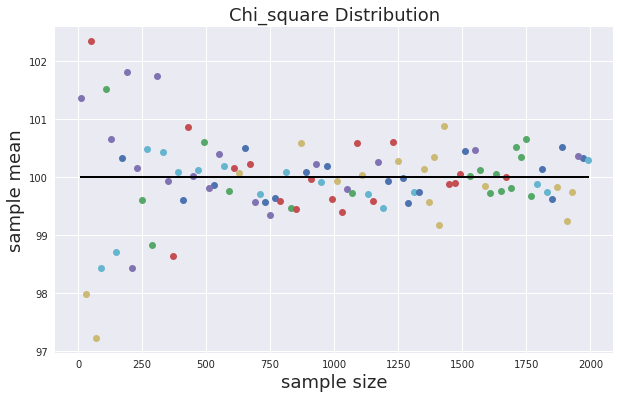

In [4]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)
md = {}
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi_square Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 1: This is a plot of  chi-sq distribution sample mean (dependent var.) against the sample size N (independent var). As the sample size increases, the sample mean will be close to the chi-sq distribution mean equal to 100 I give before. This phenomonon conforms to Law of large numbers.


Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


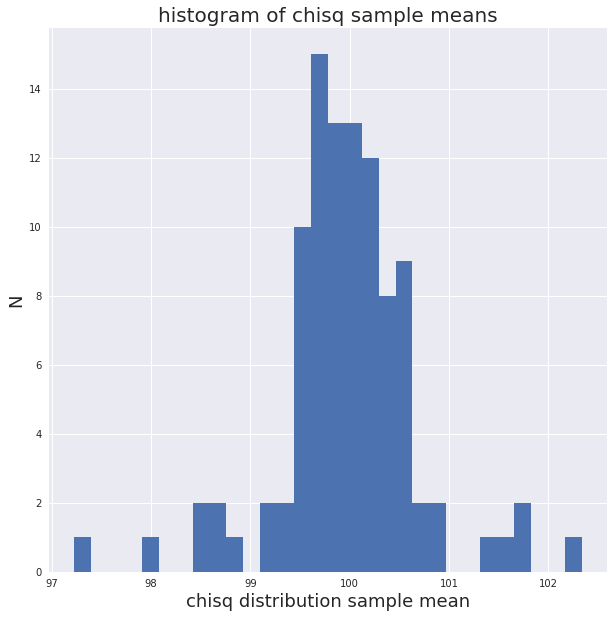

In [5]:
allmeans_chisq = list(md['chisq']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans_chisq,bins=30)
plt.title('histogram of chisq sample means',fontsize=20)
pl.xlabel('chisq distribution sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 2: This is the histogram of chisq sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


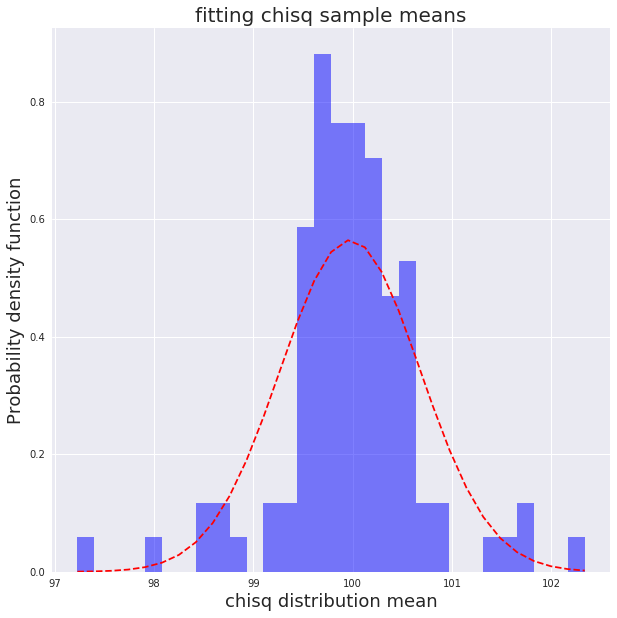

In [6]:
#fit gaussian distribution
pl.figure(figsize=(10, 10))
num_bins = 30
mu_chisq, sigma_chisq = stats.norm.fit(allmeans_chisq)
n, bins, patches = plt.hist(allmeans_chisq, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_chisq,sigma_chisq)
plt.plot(bins,y,'r--') 
plt.title('fitting chisq sample means',fontsize=20)
plt.xlabel('chisq distribution mean',fontsize = 18)
plt.ylabel('Probability density function',fontsize = 18) 
plt.show()

### Figure 3: According to central limit theorem, using gaussian distribution is proper to fit chisq distribution means.

# 2. Normal Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


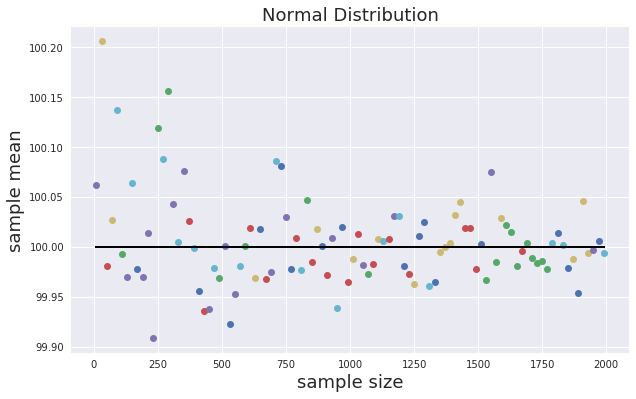

In [7]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['normal'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['normal'][n] = np.random.normal(df,size = n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal Distribution', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 4: This is a plot of normal distribution sample mean (dependent var.) against the sample size N (independent var). As the sample size increases, the sample mean will be close to the normal distribution mean equal = 100 I give before. This phenomonon conforms to Law of large numbers.¶

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


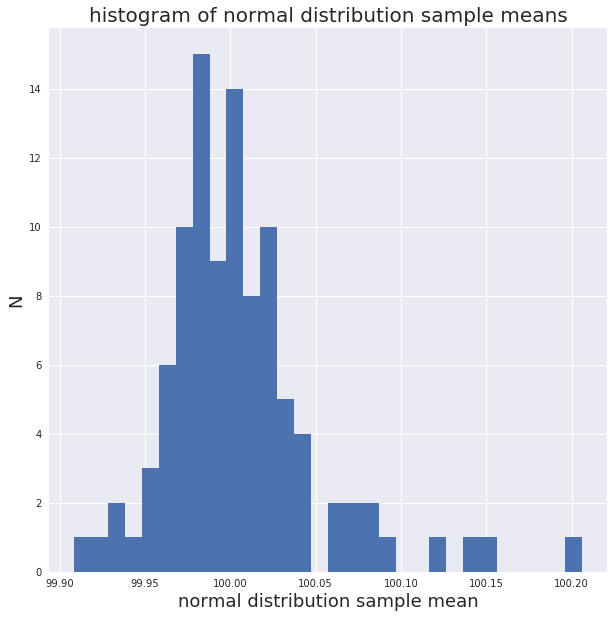

In [23]:
allmeans_normal = list(md['normal']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans_normal,bins=30)
plt.title('histogram of normal distribution sample means',fontsize=20)
pl.xlabel('normal distribution sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 5: This is the histogram of normal distribution sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


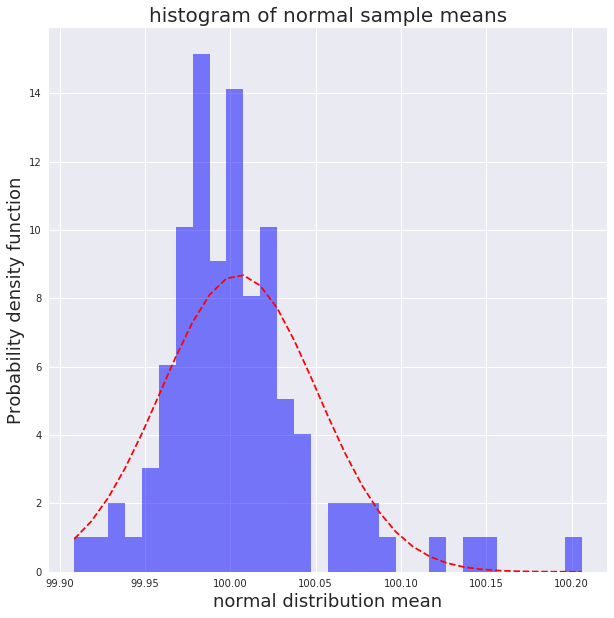

In [9]:
#fit gaussian distribution
pl.figure(figsize=(10, 10))
num_bins = 30
mu_normal, sigma_normal = stats.norm.fit(allmeans_normal)
n, bins, patches = plt.hist(allmeans_normal, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_normal,sigma_normal)
plt.plot(bins,y,'r--') 
plt.title('histogram of normal sample means',fontsize=20)
plt.xlabel('normal distribution mean',fontsize = 18)
plt.ylabel('Probability density function',fontsize = 18) 
plt.show()

### Figure 6: According to central limit theorem, using gaussian distribution is proper to fit normal distribution means.

# 3. Poisson distribution


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


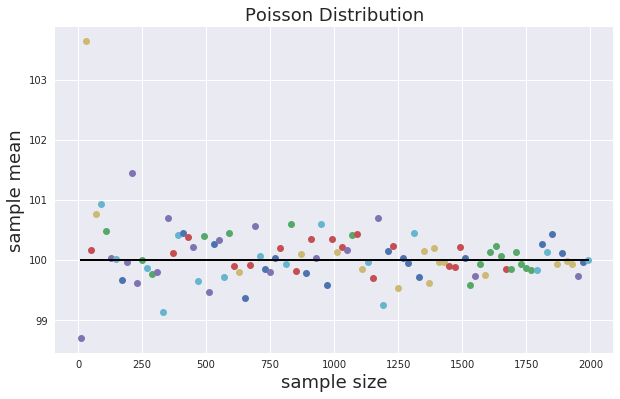

In [10]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 
lamda = df
#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(lamda,size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        

### Figure 7: This is a plot of poisson distribution sample mean (dependent var.) against the sample size N (independent var). As the sample size increases, the sample mean will be close to the poisson distribution mean equal to 100 I give before. This phenomonon conforms to Law of large numbers.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


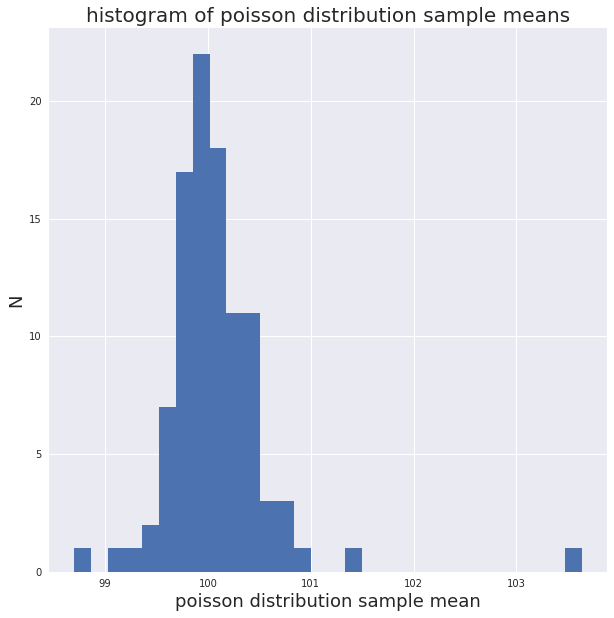

In [11]:
allmeans_pois = list(md['pois']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
plt.title('histogram of poisson distribution sample means',fontsize=20)
pl.xlabel('poisson distribution sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 8: This is the histogram of poisson distribution sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


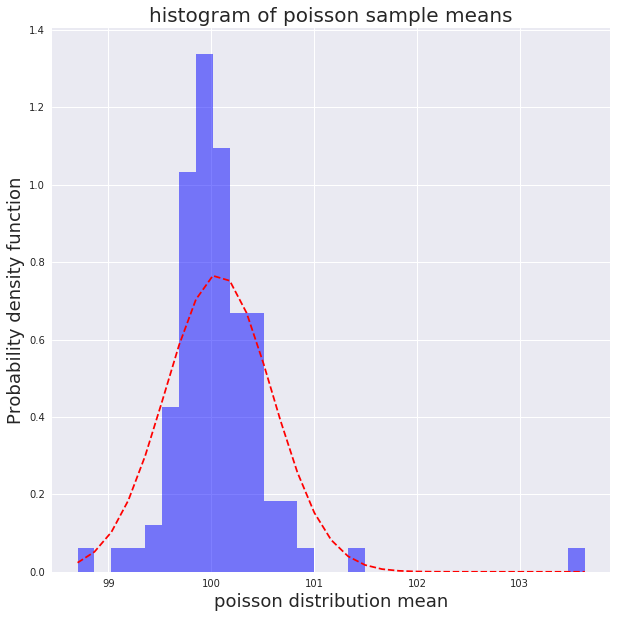

In [12]:
#fit gaussian distribution
pl.figure(figsize=(10, 10))
num_bins = 30
mu_pois, sigma_pois = stats.norm.fit(allmeans_pois)
n, bins, patches = plt.hist(allmeans_pois, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_pois,sigma_pois)
plt.plot(bins,y,'r--') 
plt.title('histogram of poisson sample means',fontsize=20)
plt.xlabel('poisson distribution mean',fontsize = 18)
plt.ylabel('Probability density function',fontsize = 18) 
plt.show()

### Figure 9: According to central limit theorem, using gaussian distribution is proper to fit poisson distribution means.

# 4. Binomial Distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


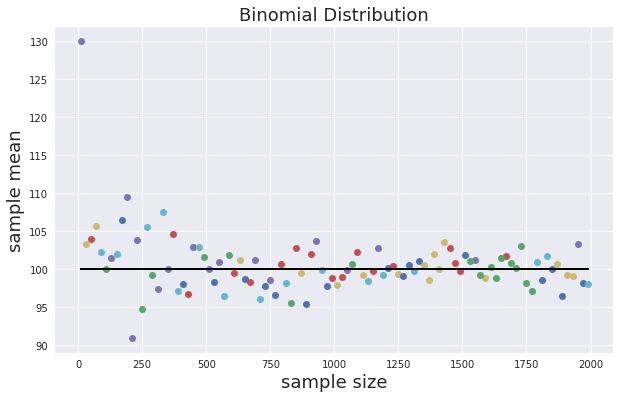

In [13]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['binomial'][n] = 100*np.random.binomial(2,0.5,size=n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 10: This is a plot of binomial distribution sample mean (dependent var.) against the sample size N (independent var). As the sample size increases, the sample mean will be close to the binomial distribution mean equal = 100 I give before. This phenomonon conforms to Law of large numbers.¶

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


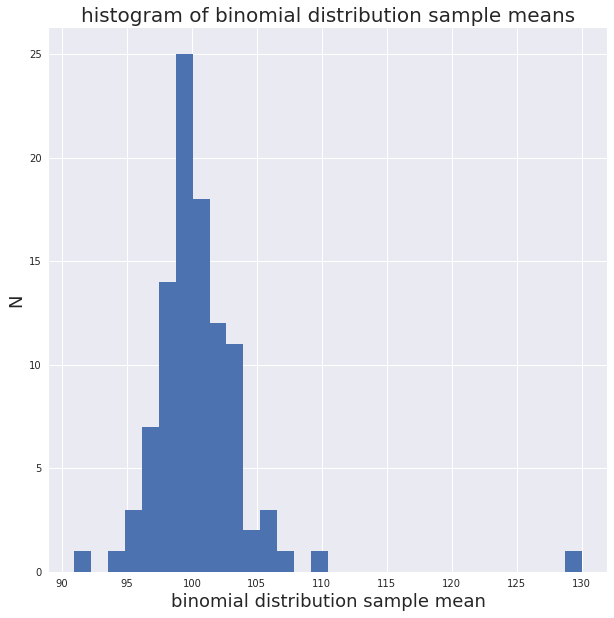

In [14]:
allmeans_binomial = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30)
plt.title('histogram of binomial distribution sample means',fontsize=20)
pl.xlabel('binomial distribution sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 11: This is the histogram of binomial distribution sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


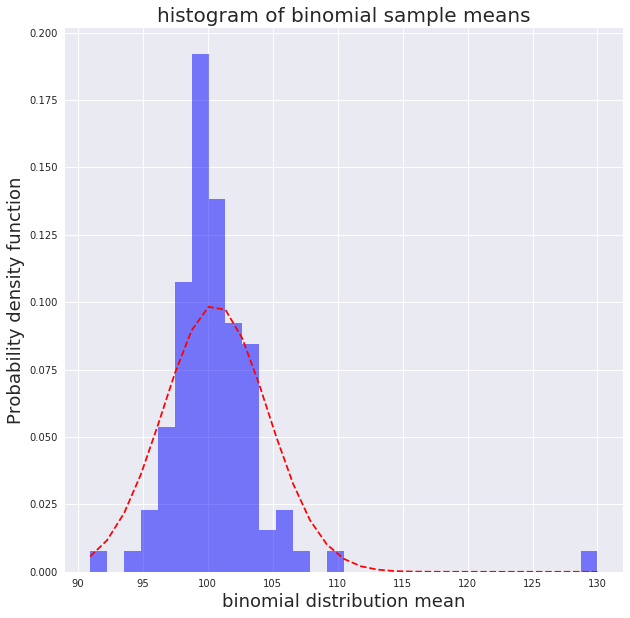

In [24]:
#fit gaussian distribution
allmeans_binomial = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
num_bins = 30
mu_binomial, sigma_binomial = stats.norm.fit(allmeans_binomial)
n, bins, patches = plt.hist(allmeans_binomial, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_binomial,sigma_binomial)
plt.plot(bins,y,'r--') 
plt.title('histogram of binomial sample means',fontsize=20)
plt.xlabel('binomial distribution mean',fontsize = 18)
plt.ylabel('Probability density function',fontsize = 18) 
plt.show()

### Figure 12: According to central limit theorem, using gaussian distribution is proper to fit binomial distribution means.

# 5. Exponential distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


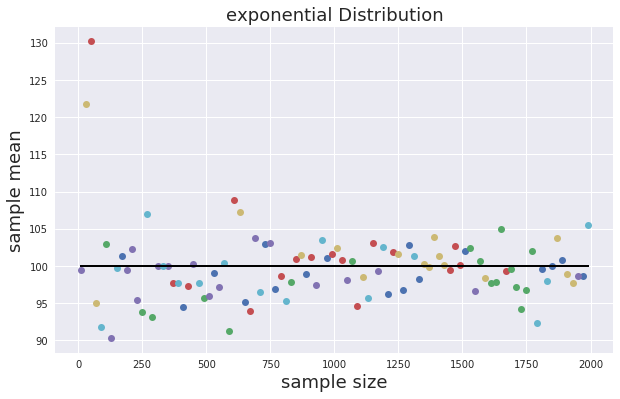

In [16]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['exponential'] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['exponential'][n] =np.random.exponential(mymean,size = n)
    
# save the means for plotting later    

md['exponential']['means'] = {}
axexponential_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()
        #and plot it
        axexponential_mu_n.plot(nn, md['exponential']['means'][nn], 'o')
        axexponential_mu_n.set_xlabel('sample size', fontsize=18)
        axexponential_mu_n.set_ylabel('sample mean', fontsize=18)
        axexponential_mu_n.set_title('exponential Distribution', fontsize=18)
        axexponential_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 13: This is a plot of exponential distribution sample mean (dependent var.) against the sample size N (independent var). As the sample size increases, the sample mean will be close to the exponential distribution mean equal = 100 I give before. This phenomonon conforms to Law of large numbers.¶

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


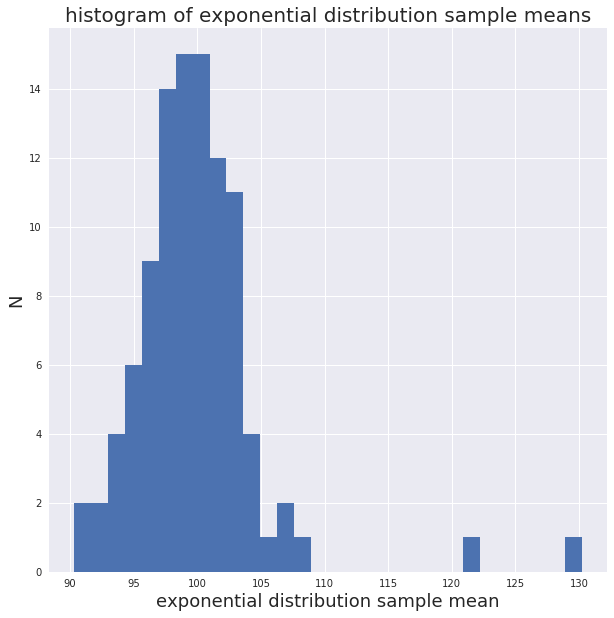

In [17]:
allmeans_exponential = list(md['exponential']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans_exponential,bins=30)
plt.title('histogram of exponential distribution sample means',fontsize=20)
pl.xlabel('exponential distribution sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 14: This is the histogram of exponential distribution sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


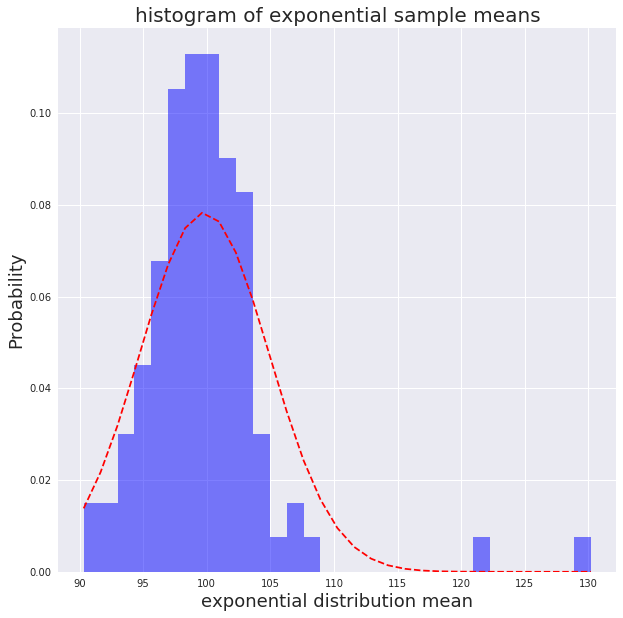

In [18]:
#fit gaussian distribution
allmeans_exponential = list(md['exponential']['means'].values())
pl.figure(figsize=(10, 10))
num_bins = 30
mu_exponential, sigma_exponential = stats.norm.fit(allmeans_exponential)
n, bins, patches = plt.hist(allmeans_exponential, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_exponential,sigma_exponential)
plt.plot(bins,y,'r--') 
plt.title('histogram of exponential sample means',fontsize=20)
plt.xlabel('exponential distribution mean',fontsize = 18)
plt.ylabel('Probability',fontsize = 18) 
plt.show()

### Figure 15: According to central limit theorem, using gaussian distribution is proper to fit exponential distribution means.

# 6. Five distributions together

In [19]:
five_together_means=allmeans_chisq + allmeans_normal + allmeans_pois + allmeans_binomial + allmeans_exponential

In [20]:
len(five_together_means)

500

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


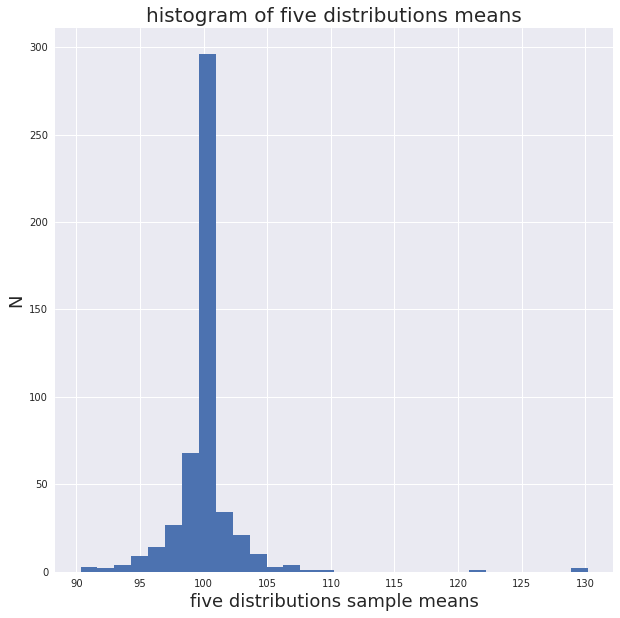

In [21]:
pl.figure(figsize=(10, 10))
pl.hist(five_together_means,bins=30)
plt.title('histogram of five distributions means',fontsize=20)
pl.xlabel('five distributions sample means', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 16: This is the histogram of exponential distribution sample means. The frequency of sample mean equal to 100 is highest. And it looks like it can be fitted using gaussian distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


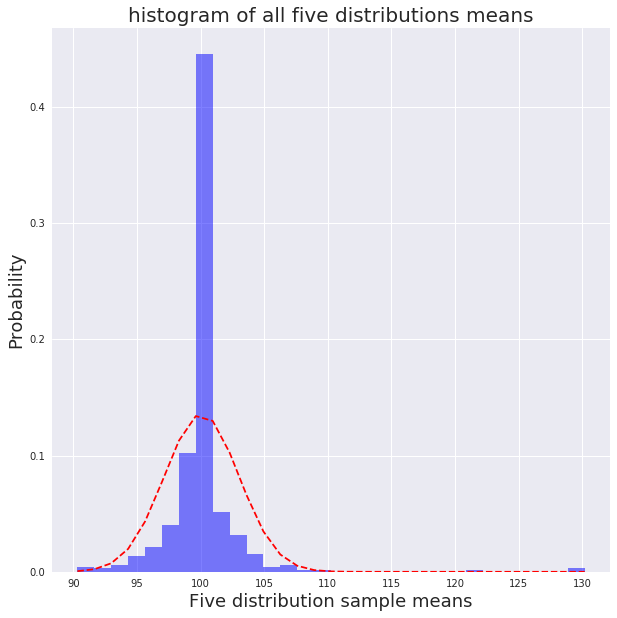

In [22]:
pl.figure(figsize=(10, 10))
num_bins = 30
mu_five_together, sigma_five_together = stats.norm.fit(five_together_means)
n, bins, patches = plt.hist(five_together_means, num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins,mu_five_together, sigma_five_together)
plt.plot(bins,y,'r--') 
plt.title('histogram of all five distributions means',fontsize=20)
plt.xlabel('Five distribution sample means',fontsize=18) 
plt.ylabel('Probability',fontsize=18) 
plt.show()

### Figure 17: According to central limit theorem, using gaussian distribution is proper to fit five distribution means.